## Preprocessing and Training

In our previous notebook we used PCA analysis to reduce the deminsionality of our stock_price dataset and found that 3 components explains 94% of the variance of the data. 

Now that we have a good estimation of the overall health of Cryptocurrencies(mimic CCI30 index), lets take a look if Google trend search results historically affect Cryptocurrency price and in future notebook, see if it can predict CCCI30 price. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load google trends dataset
gtrends = pd.read_csv('./Data/GoogleTrendsTimeline.csv')

In [3]:
gtrends.set_index('Week', inplace= True)

In [4]:
gtrends.index = pd.to_datetime(gtrends.index)

In [5]:
gtrends=gtrends.loc['2018-10-07':'2021-05-30',:]

In [6]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2018-10-07 to 2021-05-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cryptocurrency  139 non-null    object
 1   Bitcoin         139 non-null    int64 
 2   Ethereum        139 non-null    object
 3   Bitcoin Cash    139 non-null    object
 4   Dogecoin        139 non-null    object
dtypes: int64(1), object(4)
memory usage: 6.5+ KB


In [20]:
gtrends

,Cryptocurrency,Bitcoin,Ethereum,Bitcoin Cash,Dogecoin
Week,,,,,
2018-10-07,2,8,1,0,0
2018-10-14,2,9,1,0,0
2018-10-21,2,8,1,0,0
2018-10-28,2,8,1,0,0
2018-11-04,2,8,1,1,0
...,...,...,...,...,...
2021-05-02,26,35,18,1,35
2021-05-09,31,43,20,1,35
2021-05-16,30,74,18,1,16


Cryptocurrency, Ethereum, Bitcoin Cash, and Dogecoin is a object. We need to clean the data and turn it into an int64 column type

In [23]:
#replace all instances of '<1' in the cryptocurrency column with 0

gtrends= gtrends.replace('<1',0)

gtrends['Cryptocurrency'] = pd.to_numeric(gtrends['Cryptocurrency'])
gtrends['Ethereum'] = pd.to_numeric(gtrends['Ethereum'])
gtrends['Bitcoin Cash'] = pd.to_numeric(gtrends['Bitcoin Cash'])                                                  
gtrends['Dogecoin'] = pd.to_numeric(gtrends['Dogecoin'])                                                 
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2018-10-07 to 2021-05-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Cryptocurrency  139 non-null    int64
 1   Bitcoin         139 non-null    int64
 2   Ethereum        139 non-null    int64
 3   Bitcoin Cash    139 non-null    int64
 4   Dogecoin        139 non-null    int64
dtypes: int64(5)
memory usage: 6.5 KB


<AxesSubplot:xlabel='Week'>

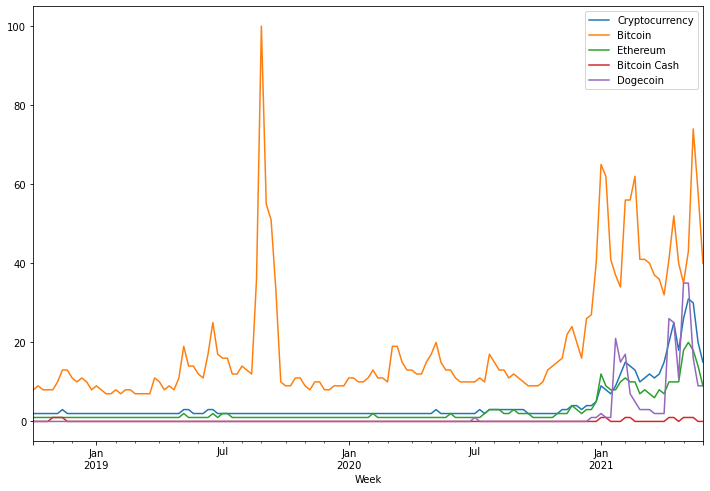

In [24]:
#Plot the google trends data
gtrends.plot(y = ['Cryptocurrency','Bitcoin','Ethereum','Bitcoin Cash','Dogecoin'], figsize=(12, 8))

Now that we have plotted the google trends data, lets look at the PCA Mean for 4 components

## Plotting PCA dataset using the mean of the rows

In [12]:
pca_dataset = pd.read_csv('./Data/PCA_Dataset.csv', index_col = 0)

In [13]:
pca_dataset.head()

,principal component 1,principal component 2,principal component 3,principal component 4
Date,,,,
2018-10-07,-0.542679,1.437197,2.120555,0.721078
2018-10-14,-0.518300,1.782037,3.843036,2.165401
2018-10-21,-0.574753,1.418019,2.490857,1.024196
2018-10-28,-0.539376,0.412904,2.273500,-0.232721
2018-11-04,-0.266113,1.083518,2.288260,0.231417


In [14]:
pca_dataset = np.abs(pca_dataset)
pca_dataset['PCA_mean'] = pca_dataset.mean(axis=1)

C:\Users\kenne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

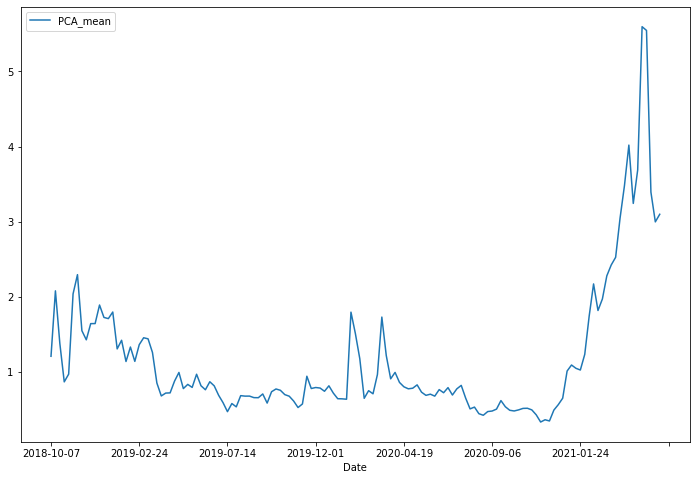

In [15]:
pca_dataset.plot(y = 'PCA_mean', figsize = (12,8))

Both graphs follow a similar structure. Google trends has a spike in populatirty around the beginning of 2021. 
The PCA graph shows a increase in closing price also around the same time in 2021